In [1]:
import sys
sys.path.append("..")

from plotting_tools import *

In [2]:
def get_age_group_distribution(person_filename):
    # Read person df
    df = pd.read_csv(person_filename, sep=',')
    # Only keep person id and age
    df_age = df[['puid', 'age']].drop_duplicates()
    # Count number of persons per age group
    age_group_bins = pd.cut(df_age['age'], bins=[-1, 4, 15, 34, 59, 79, 120],
                            labels=['0-4', '5-15', '16-34', '35-59', '60-79', '80+']).reset_index(
                                name='age_group').groupby(['age_group']).size().reset_index(name='counts')
    # Calculate percentages
    age_group_bins['percentage'] = age_group_bins['counts'].transform(
        lambda x: x * 100 / x.sum())
    return age_group_bins

C:\Users\bick_ju\AppData\Local\Temp\ipykernel_12068\187898381.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  name='age_group').groupby(['age_group']).size().reset_index(name='counts')


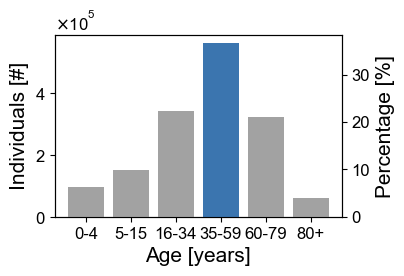

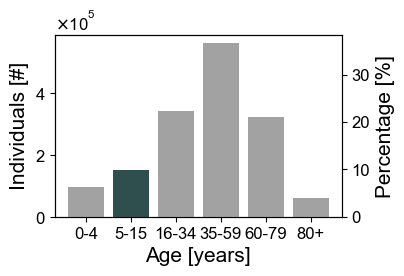

In [ ]:
person_csv = 'persons.csv'
df = get_age_group_distribution(person_csv)

# Agent 1
panel_pos = [0.16, 0.2, 0.7, 0.7]
figsize = (4.1, 2.6)
fig = plt.figure(figsize=figsize)
ax1 = fig.add_axes(panel_pos)
ax2 = ax1.twinx()
bar_colors = [colors['Medium grey'] for _ in range(6)]
bar_colors[3] = colors['Blue']
ax1.bar(df.age_group, df.counts, color = bar_colors)
ax1.set_xlabel('Age [years]')
ax1.set_ylabel('Individuals [#]')
ax2.bar(df.age_group, df.percentage, color = bar_colors)
ax2.set_ylabel('Percentage [%]')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((5, 5))
ax1.yaxis.set_major_formatter(formatter)
fig.savefig('age_group_distribution_ag4.png', dpi=dpi)
plt.show()
# Agent 2
fig = plt.figure(figsize=figsize)
ax1 = fig.add_axes(panel_pos)
ax2 = ax1.twinx()
bar_colors = [colors['Medium grey'] for _ in range(6)]
bar_colors[1] = colors['Dark green']
ax1.bar(df.age_group, df.counts, color = bar_colors)
ax1.set_xlabel('Age [years]')
ax1.set_ylabel('Individuals [#]')
ax2.bar(df.age_group, df.percentage, color = bar_colors)
ax2.set_ylabel('Percentage [%]')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((5, 5))
ax1.yaxis.set_major_formatter(formatter)
fig.savefig('age_group_distribution_ag2.png', dpi=dpi)
plt.show()